<a href="https://colab.research.google.com/github/AngelicaCeDi/Analitica3/blob/main/Modelo_RH_Angelica_Ceballos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Comprensión de los datos**

In [1182]:
#IMPORTAR PAQUETES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot

In [1185]:
#Cargar bases de datos 
url1='https://raw.githubusercontent.com/AngelicaCeDi/Analitica3/main/general_data.csv'
url2='https://raw.githubusercontent.com/AngelicaCeDi/Analitica3/main/employee_survey_data.csv'
url3='https://raw.githubusercontent.com/AngelicaCeDi/Analitica3/main/manager_survey_data.csv'
url4='https://raw.githubusercontent.com/AngelicaCeDi/Analitica3/main/retirement_info.csv'
url5='https://raw.githubusercontent.com/AngelicaCeDi/Analitica3/main/in_time.csv'
url6='https://raw.githubusercontent.com/AngelicaCeDi/Analitica3/main/out_time.csv'
general=pd.read_csv(url1 ,sep=';')
employee=pd.read_csv(url2 ,sep=',')
manager=pd.read_csv(url3 ,sep=',')
retirement=pd.read_csv(url4 ,sep=';')
in_time=pd.read_csv(url5 ,sep=',')
out_time=pd.read_csv(url6 ,sep=',')

# **Datos Iniciales, limpieza y transformación**



In [1186]:
#Se ven las dimesiones de cada base de datos 
print(general.shape,
      employee.shape,
      manager.shape,
      retirement.shape,
      in_time.shape,
      out_time.shape)

(4410, 23) (4410, 4) (4410, 3) (711, 5) (4410, 262) (4410, 262)


In [1187]:
#Se hacen copias de cada base de datos para proceder a concatenarlas
df_general=general.copy()
df_employee=employee.copy()
df_manager=manager.copy()
df_rt=retirement.copy()
df_in=in_time.copy()
df_out=out_time.copy()

In [1188]:
#tratar nulos de bases de datos 
df_general.isnull().sum()
df_employee.isnull().sum() 
df_manager.isnull().sum()
df_rt.isnull().sum()
#df_in.isnull().sum()
#df_out.isnull().sum()

EmployeeID            0
Attrition             0
retirementDate        0
retirementType        0
resignationReason    70
dtype: int64

In [1189]:
df_rt=df_rt.fillna({'resignationReason':'Others' }) #Se cambian los nulos de esta columna por 'Others' en los registros que aparecian con NaN

In [1190]:
df_rt

,EmployeeID,Attrition,retirementDate,retirementType,resignationReason
0,2,Yes,15/10/2016,Resignation,Others
1,7,Yes,20/07/2016,Resignation,Stress
2,14,Yes,08/11/2016,Resignation,Others
3,29,Yes,15/10/2016,Resignation,Others
4,31,Yes,08/02/2016,Resignation,Salary
...,...,...,...,...,...
706,4382,Yes,18/04/2016,Resignation,Salary
707,4387,Yes,16/09/2016,Resignation,Others
708,4389,Yes,24/05/2016,Resignation,Others
709,4392,Yes,26/02/2016,Fired,Others


In [1191]:
df_rt['resignationReason'].unique()#Se verifica el cambio

array(['Others', 'Stress', 'Salary'], dtype=object)

In [1192]:
#Se procede a concatenar las copias de las bases de datos general, employee, manager y retirement para tenerlos en un solo dataset y proceder a la limpieza de estos datos.
df_temporal=pd.merge(df_general, df_employee, on='EmployeeID')
df_temporal

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,...,8,0,1.0,6,1,0,0,3.0,4.0,2.0
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,...,8,1,6.0,3,5,1,4,3.0,2.0,4.0
2,32,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,...,8,3,5.0,2,5,0,3,2.0,2.0,1.0
3,38,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,...,8,3,13.0,5,8,7,5,4.0,4.0,3.0
4,32,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,...,8,2,9.0,2,6,0,4,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,...,8,1,10.0,5,3,0,2,4.0,1.0,3.0
4406,29,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,...,8,0,10.0,2,3,0,2,4.0,4.0,3.0
4407,25,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,...,8,0,5.0,4,4,1,2,1.0,3.0,3.0
4408,42,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,...,8,1,10.0,2,9,7,8,4.0,1.0,3.0


In [1193]:
df_temporal2=pd.merge(df_temporal, df_manager, on='EmployeeID')
df_temporal2

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,29,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,25,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4
4408,42,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,...,10.0,2,9,7,8,4.0,1.0,3.0,2,3


In [1194]:
df_data=pd.merge(df_temporal2, df_rt, on='EmployeeID', how='left')
df_data

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition,retirementDate,retirementType,resignationReason
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,...,0,3.0,4.0,2.0,3,3,NaN,NaN,NaN,NaN
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,...,4,3.0,2.0,4.0,2,4,Yes,15/10/2016,Resignation,Others
2,32,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,...,3,2.0,2.0,1.0,3,3,NaN,NaN,NaN,NaN
3,38,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,...,5,4.0,4.0,3.0,2,3,NaN,NaN,NaN,NaN
4,32,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,...,4,4.0,1.0,3.0,3,3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,...,2,4.0,1.0,3.0,3,3,NaN,NaN,NaN,NaN
4406,29,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,...,2,4.0,4.0,3.0,2,3,NaN,NaN,NaN,NaN
4407,25,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,...,2,1.0,3.0,3.0,3,4,NaN,NaN,NaN,NaN
4408,42,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,...,8,4.0,1.0,3.0,2,3,NaN,NaN,NaN,NaN


In [1195]:
#Queda un solo dataframe llamado df_data con la información relevante para proceder a limpiarla
print(df_data.shape, df_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   BusinessTravel           4410 non-null   object 
 2   Department               4410 non-null   object 
 3   DistanceFromHome         4410 non-null   int64  
 4   Education                4410 non-null   int64  
 5   EducationField           4410 non-null   object 
 6   EmployeeCount            4410 non-null   int64  
 7   EmployeeID               4410 non-null   int64  
 8   Gender                   4410 non-null   object 
 9   JobLevel                 4410 non-null   int64  
 10  JobRole                  4410 non-null   object 
 11  MaritalStatus            4410 non-null   object 
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4391 non-null   float64
 14  Over18                  

In [1196]:
# Tipos de datos
df_data.dtypes

Age                          int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
JobInvolvement               int64
PerformanceRating            int64
Attrition           

In [1197]:
#Observar cuantos nulos hay en cada columna
df_data.isnull().sum()

Age                           0
BusinessTravel                0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeID                    0
Gender                        0
JobLevel                      0
JobRole                       0
MaritalStatus                 0
MonthlyIncome                 0
NumCompaniesWorked           19
Over18                        0
PercentSalaryHike             0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             9
TrainingTimesLastYear         0
YearsAtCompany                0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
EnvironmentSatisfaction      25
JobSatisfaction              20
WorkLifeBalance              38
JobInvolvement                0
PerformanceRating             0
Attrition                  3699
retirementDate             3699
retirementType             3699
resignat

In [1198]:
# Estadistica Variables cuantitativas
df_data.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,...,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,...,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,...,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,...,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [1199]:
#Columnas de la base de datos
df_data.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating', 'Attrition', 'retirementDate',
       'retirementType', 'resignationReason'],
      dtype='object')

In [1200]:
df_data

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition,retirementDate,retirementType,resignationReason
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,...,0,3.0,4.0,2.0,3,3,NaN,NaN,NaN,NaN
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,...,4,3.0,2.0,4.0,2,4,Yes,15/10/2016,Resignation,Others
2,32,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,...,3,2.0,2.0,1.0,3,3,NaN,NaN,NaN,NaN
3,38,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,...,5,4.0,4.0,3.0,2,3,NaN,NaN,NaN,NaN
4,32,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,...,4,4.0,1.0,3.0,3,3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,...,2,4.0,1.0,3.0,3,3,NaN,NaN,NaN,NaN
4406,29,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,...,2,4.0,4.0,3.0,2,3,NaN,NaN,NaN,NaN
4407,25,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,...,2,1.0,3.0,3.0,3,4,NaN,NaN,NaN,NaN
4408,42,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,...,8,4.0,1.0,3.0,2,3,NaN,NaN,NaN,NaN


In [1201]:
#Reemplazar valores Nulos
df_data = df_data.fillna({'NumCompaniesWorked': 2})    # LOS VALORES NULOS DEL NUMERO DE EMPRESAS EN LAS CUALES HA TRABAJADO, EL 50% DE LOS EMPLEADOS HA TRABAJADO EN ALMENOS 2 POR LO QUE SE REEMPLAZAN LOS NULOS POR ESTE VALOR

In [1202]:
df_data = df_data.fillna({'TotalWorkingYears': 6}) #SE CAMBIAN LOS NULOS DE ESTA COLUMNA POR 6 QUE ES EL PERCENTIL DEL 25% DE LOS DATOS DE ESTA VARIABLE CUANTITATIVA

In [1203]:
df_data = df_data.fillna({'EnvironmentSatisfaction': 3}) #SE CAMBIA POR LA MEDIA DE CALIFICACIÓN DEL EMPELADO EN LA ENCUESTA DE CALIFICACIÓN EN ESTE CRITERIO YA QUE NO REGISTRA CALIFICACIÓN.

In [1204]:
df_data = df_data.fillna({'JobSatisfaction': 3}) #SE CAMBIA POR LA MEDIA DE CALIFICACIÓN DEL EMPELADO EN LA ENCUESTA DE CALIFICACIÓN YA QUE NO REGISTRA CALIFICACIÓN

In [1205]:
df_data = df_data.fillna({'retirementType': 'Employee'}) #SE CAMBIA LOS NULOS DE ESTA COLUMNA POR EMPLEADO PARA LOS QUE AUN SE ENCUENTRAN ACTIVOS

In [1206]:
df_data = df_data.fillna({'resignationReason': 'Active'}) #SE CAMBIA LOS NULOS DE ESTA COLUMNA POR ACTIVO PARA LOS QUE AUN SE ENCUENTRAN TRABAJANDO EN LA EMPRESA

In [1207]:
df_data = df_data.fillna({'WorkLifeBalance': 3}) #SE CAMBIA POR LA MEDIA DE CALIFICACIÓN DE LA COLUMNA DE SATISFACCIÓN DEL EMPELADO EN LA ENCUESTA DE CALIFICACIÓN YA QUE NO REGISTRA CALIFICACIÓN

In [1208]:
df_data=df_data.drop(['Attrition'],axis=1) # SE ELIMINA ATTRICTION PUES NO SE VE INFORMACIÓN RELEVANTE QUE EXTRAER DE ESTA COLUMNA PUES TODOS SUS REGISTROS SON 'YES'

In [1209]:
df_data=df_data.drop(['EmployeeCount'],axis=1) #SE ELIMINA ESTA COLUMNA YA QUE CONTIENE PARA TODOS LOS EMPLEADOS EL MISMO DATO DE 1.0

In [1210]:
df_data=df_data.drop(['StandardHours'],axis=1) #SE ELIMINA ESTA COLUMNA YA QUE CONTIENE PARA TODOS LOS EMPLEADOS EL MISMO HORARIO DE TRABAJO DE 8 HORAS

In [1211]:
df_data=df_data.drop(['retirementDate'],axis=1) #SE ELEIMINA ESTA COLUMNA PUES SE ANALIZA POR APARTE YA QUE AL JUNTAR AMBAS TABLAS QUEDAN DEMASIADOS NULOS

In [1212]:
df_data=df_data.drop(['Over18'],axis=1) #SE ELEIMINA ESTA COLUMNA PUES TIENE EL MISMO DATO DE SER MAYOR DE 18 AÑOS COSA QUE ES OBVIA

In [1213]:
#Ver cuantos nulos quedaron
df_data.isnull().sum()

Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
retirementType             0
resignationReason          0
dtype: int64

In [1214]:
#Variables cuantitativas
df_data.describe()

,Age,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,2205.500000,2.063946,65029.312925,2.691837,15.209524,0.793878,11.269161,2.799320,7.008163,2.187755,4.123129,2.725170,2.729478,2.763492,2.729932,3.153741
std,9.133301,8.105026,1.023933,1273.201673,1.106689,47068.888559,2.493912,3.659108,0.851883,7.777927,1.288978,6.125135,3.221699,3.567327,1.089852,1.098904,0.703541,0.711400,0.360742
min,18.000000,1.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,30.000000,2.000000,2.000000,1103.250000,1.000000,29110.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,2205.500000,2.000000,49190.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,3307.750000,3.000000,83800.000000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,60.000000,29.000000,5.000000,4410.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [1215]:
#Variables cualitativas
df_data.describe(include = 'object')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,retirementType,resignationReason
count,4410,4410,4410,4410,4410,4410,4410,4410
unique,3,3,6,2,9,3,3,4
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Employee,Active
freq,3129,2883,1818,2646,978,2019,3699,3699


In [1216]:
df_data[df_data.duplicated()]  #No Hay filas duplicadas

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,retirementType,resignationReason


In [1217]:
df_data.shape #La base de datos para analizar tiene 4410 registros y 27 columnas

(4410, 27)

In [1218]:
df_fechart=pd.DataFrame(df_rt['retirementDate']) #Se hace un data frame para analizar un poco la fecha de retiro

In [1219]:
df_fechart['retirementDate']=pd.to_datetime(df_fechart['retirementDate'])

In [1220]:
df_fechart['month']=df_fechart['retirementDate'].dt.month

In [1221]:
df_fechart['month'].value_counts().sort_values() # Cuantos trabajadores fueron despedidos o se retiraron por mes en orden ascendente

12    26
9     46
4     55
8     59
11    60
10    61
2     61
3     62
6     63
5     69
1     72
7     77
Name: month, dtype: int64

### Se verifican las categorias de las variables categoricas

In [1222]:
df_data['BusinessTravel'].value_counts() 

Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: BusinessTravel, dtype: int64

In [1223]:
df_data['Department'].value_counts()

Research & Development    2883
Sales                     1338
Human Resources            189
Name: Department, dtype: int64

In [1224]:
df_data['EducationField'].value_counts()

Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: EducationField, dtype: int64

In [1225]:
df_data['Gender'].value_counts()

Male      2646
Female    1764
Name: Gender, dtype: int64

In [1226]:
df_data['JobRole'].value_counts()

Sales Executive              978
Research Scientist           876
Laboratory Technician        777
Manufacturing Director       435
Healthcare Representative    393
Manager                      306
Sales Representative         249
Research Director            240
Human Resources              156
Name: JobRole, dtype: int64

In [1227]:
df_data['MaritalStatus'].value_counts()

Married     2019
Single      1410
Divorced     981
Name: MaritalStatus, dtype: int64

In [1228]:
df_data['retirementType'].value_counts()

Employee       3699
Resignation     641
Fired            70
Name: retirementType, dtype: int64

In [1229]:
df_data['resignationReason'].value_counts()

Active    3699
Others     393
Salary     189
Stress     129
Name: resignationReason, dtype: int64

In [1230]:
df_data['EnvironmentSatisfaction'].value_counts()  

3.0    1375
4.0    1334
2.0     856
1.0     845
Name: EnvironmentSatisfaction, dtype: int64

In [1231]:
df_data['JobSatisfaction'].value_counts()

4.0    1367
3.0    1343
1.0     860
2.0     840
Name: JobSatisfaction, dtype: int64

In [1232]:
df_data['WorkLifeBalance'].value_counts()

3.0    2698
2.0    1019
4.0     454
1.0     239
Name: WorkLifeBalance, dtype: int64

In [1233]:
df_data['JobInvolvement'].value_counts()

3    2604
2    1125
4     432
1     249
Name: JobInvolvement, dtype: int64

In [1234]:
df_data['PerformanceRating'].value_counts()

3    3732
4     678
Name: PerformanceRating, dtype: int64

# **Análisis exploratorio**

In [1235]:
df_data.columns 

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeID', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating',
       'retirementType', 'resignationReason'],
      dtype='object')

In [1236]:
df_data

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,retirementType,resignationReason
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,...,1,0,0,3.0,4.0,2.0,3,3,Employee,Active
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,Research Scientist,...,5,1,4,3.0,2.0,4.0,2,4,Resignation,Others
2,32,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,Sales Executive,...,5,0,3,2.0,2.0,1.0,3,3,Employee,Active
3,38,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,Human Resources,...,8,7,5,4.0,4.0,3.0,2,3,Employee,Active
4,32,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,Sales Executive,...,6,0,4,4.0,1.0,3.0,3,3,Employee,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,Travel_Rarely,Research & Development,5,4,Medical,4406,Female,1,Research Scientist,...,3,0,2,4.0,1.0,3.0,3,3,Employee,Active
4406,29,Travel_Rarely,Research & Development,2,4,Medical,4407,Male,1,Laboratory Technician,...,3,0,2,4.0,4.0,3.0,2,3,Employee,Active
4407,25,Travel_Rarely,Research & Development,25,2,Life Sciences,4408,Male,2,Sales Executive,...,4,1,2,1.0,3.0,3.0,3,4,Employee,Active
4408,42,Travel_Rarely,Sales,18,2,Medical,4409,Male,1,Laboratory Technician,...,9,7,8,4.0,1.0,3.0,2,3,Employee,Active


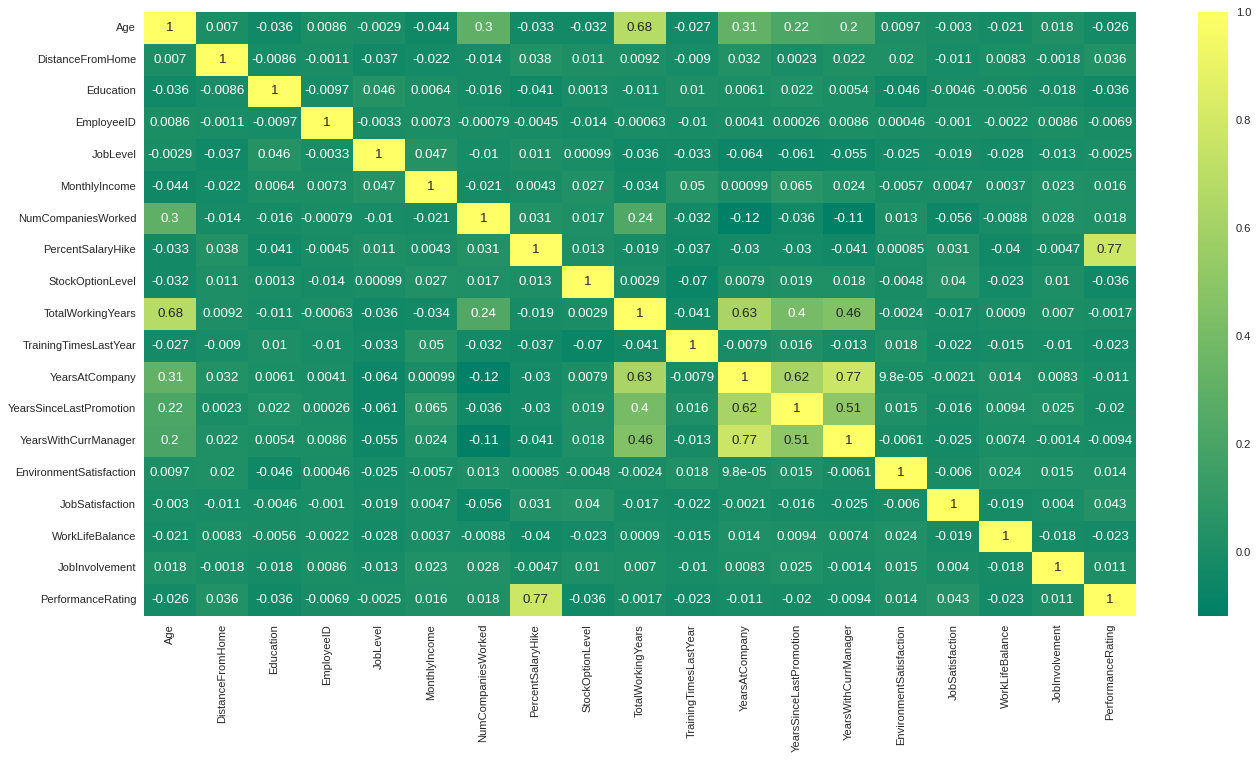

In [1237]:
from matplotlib import colorbar
#Grafico de correlación
from matplotlib.pyplot import figure
figure(figsize=(20, 10), dpi=80);
sns.heatmap(df_data.corr(), annot = True, cmap='summer'); 
#Hay correlación fuerte positiva en las variables percentSalaryHike- performanceRaiting, entre Age-totalWorkingYears, entre totalWorkingYears-Yearsatcompany, Yearsatcompany-Yearswithcurrmanager, Yearsatcompany-YearsSincelastPromotion

<AxesSubplot:xlabel='Gender'>

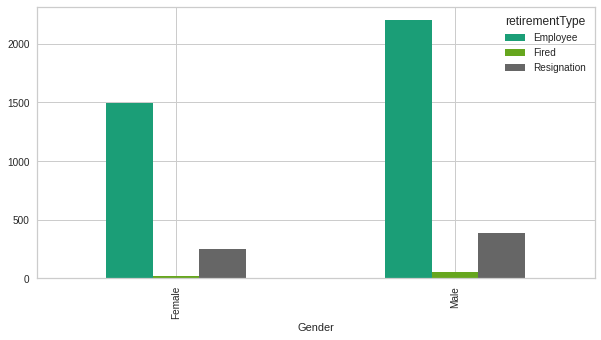

In [1238]:
# Que genero es el que se esta retirando mas y el de los empleados
pd.crosstab(index=df_data['Gender'],
            columns=df_data['retirementType']).plot(kind='bar', figsize=(10,5),colormap='Dark2') 

<AxesSubplot:xlabel='Age'>

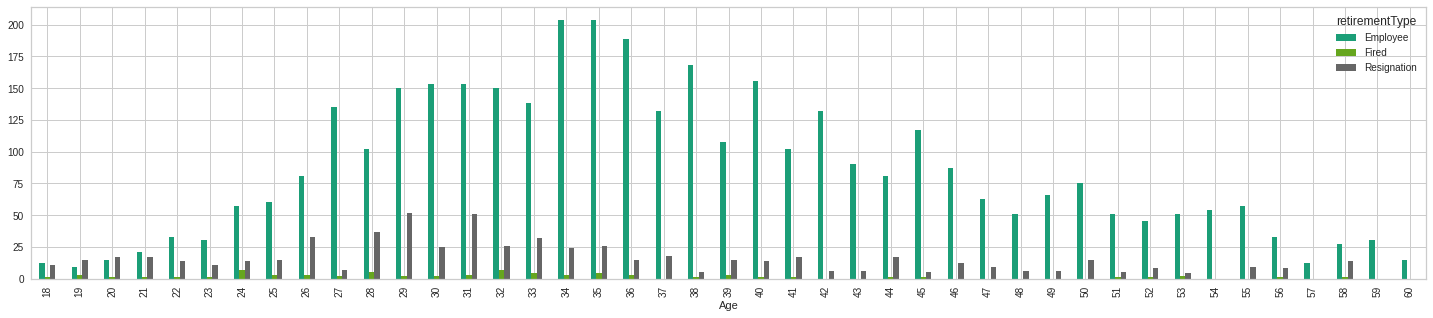

In [1239]:
# Personas de que edad se retiran mas
pd.crosstab(index=df_data['Age'],
            columns=df_data['retirementType']).plot(kind='bar', figsize=(25,5), colormap='Dark2')

<AxesSubplot:ylabel='EducationField'>

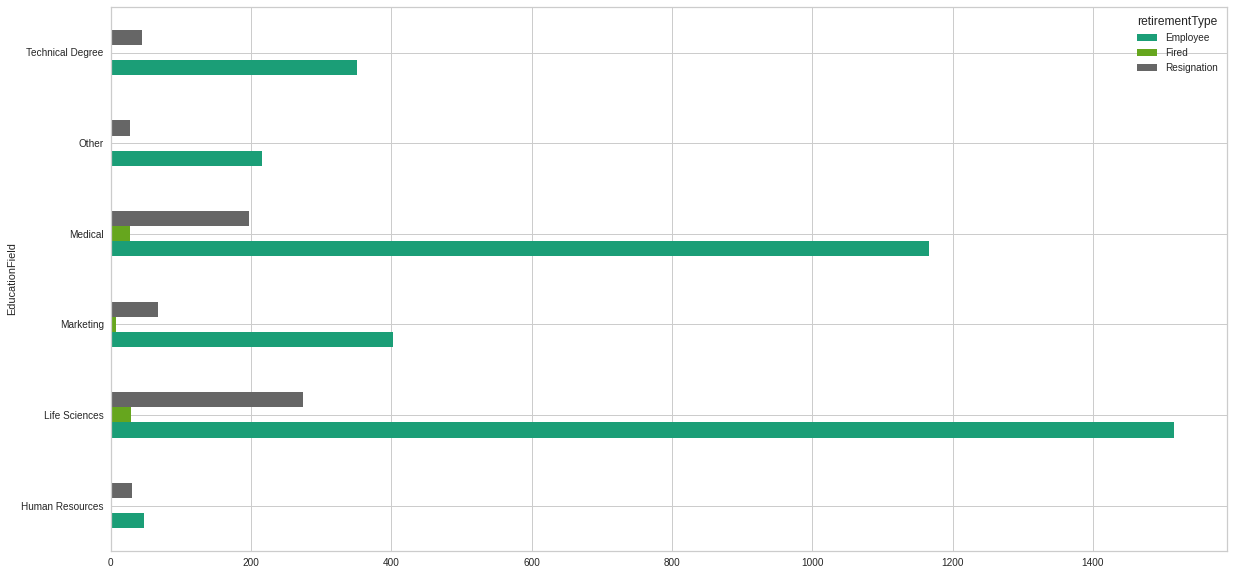

In [1240]:
# Profesion de los retirados
pd.crosstab(index=df_data['EducationField'],
            columns=df_data['retirementType']).plot(kind='barh', figsize=(20,10), colormap='Dark2')

<AxesSubplot:ylabel='JobRole'>

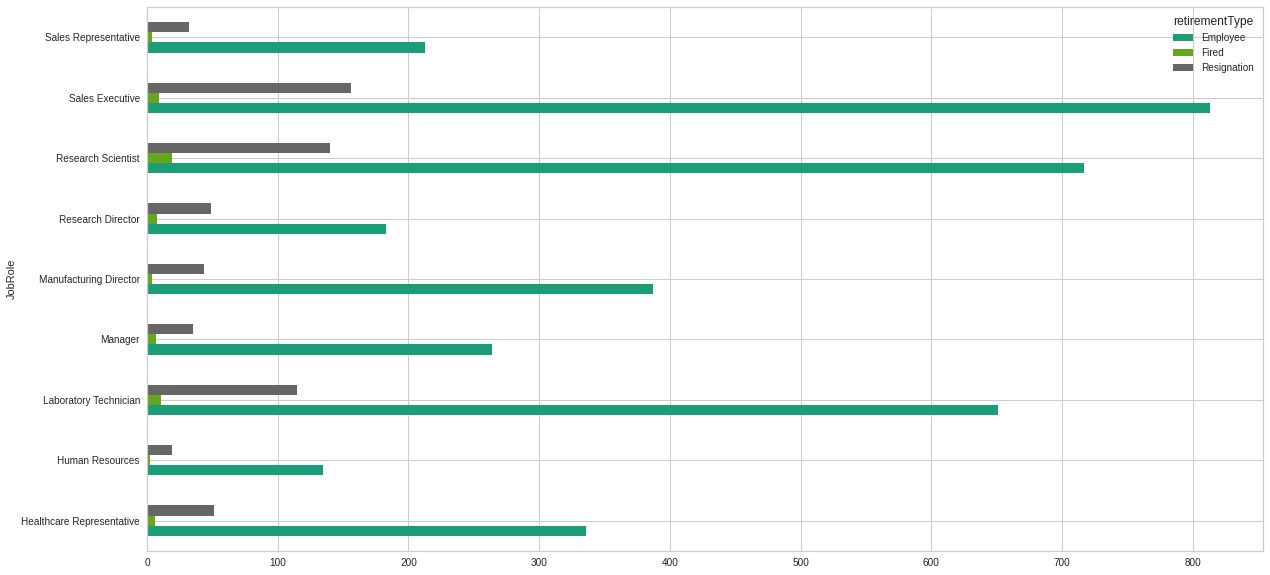

In [1241]:
# Rol en la empresa de los retirados
pd.crosstab(index=df_data['JobRole'],
            columns=df_data['retirementType']).plot(kind='barh', figsize=(20,10), colormap='Dark2')

array([<AxesSubplot:ylabel='Employee'>, <AxesSubplot:ylabel='Fired'>,
       <AxesSubplot:ylabel='Resignation'>], dtype=object)

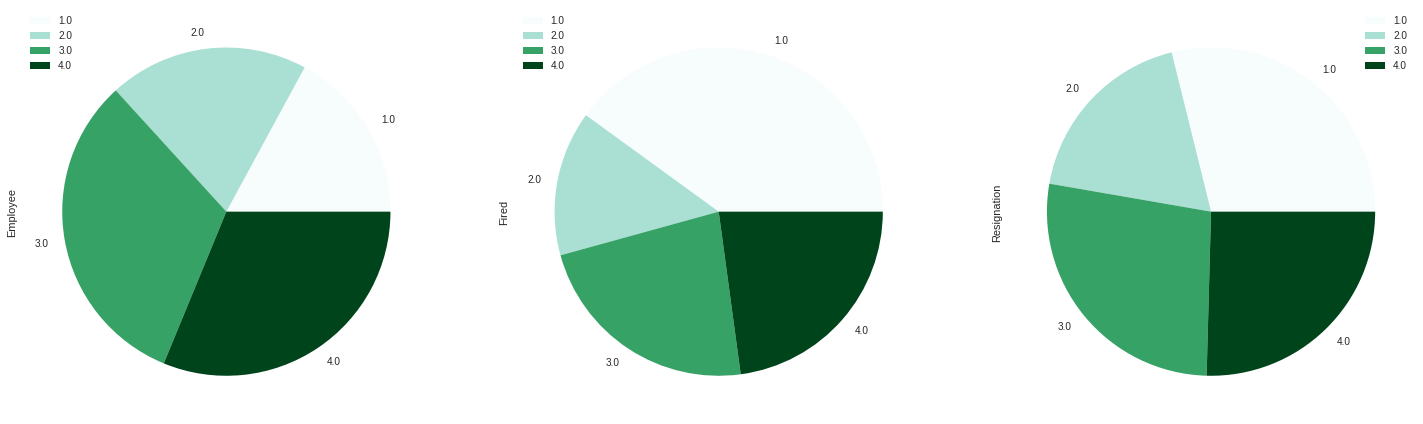

In [1242]:
#Satisfacción de los empleados y retirados con el ambiente de trabajo
pd.crosstab(index=df_data['EnvironmentSatisfaction'],
            columns=df_data['retirementType']).plot(kind='pie', figsize=(25,10), colormap='BuGn', subplots='True')

array([<AxesSubplot:ylabel='Employee'>, <AxesSubplot:ylabel='Fired'>,
       <AxesSubplot:ylabel='Resignation'>], dtype=object)

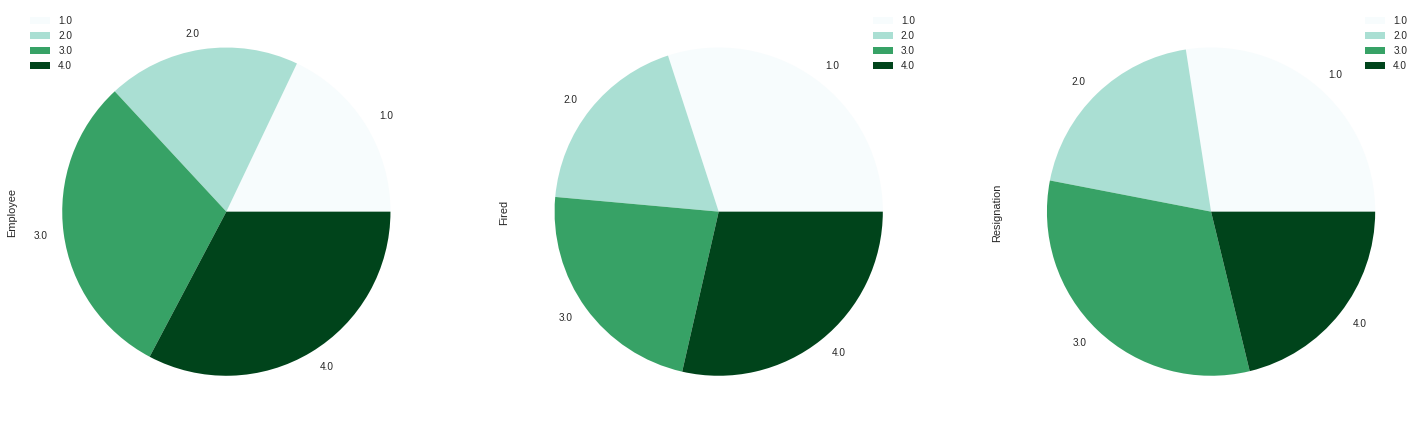

In [1243]:
#Satisfacción de los empleados y retirados con el trabajo asignado
pd.crosstab(index=df_data['JobSatisfaction'],
            columns=df_data['retirementType']).plot(kind='pie', figsize=(25,10), colormap='BuGn', subplots='True')

array([<AxesSubplot:ylabel='Employee'>, <AxesSubplot:ylabel='Fired'>,
       <AxesSubplot:ylabel='Resignation'>], dtype=object)

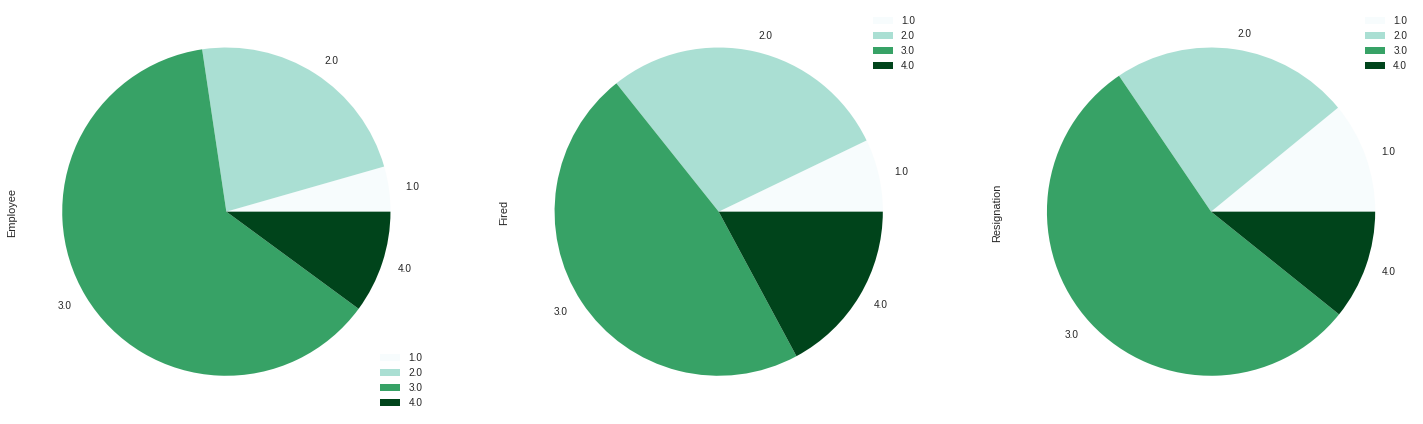

In [1244]:
#Nivel de vida de retirados y empleados
pd.crosstab(index=df_data['WorkLifeBalance'],
            columns=df_data['retirementType']).plot(kind='pie', figsize=(25,10), colormap='BuGn', subplots='True')

array([<AxesSubplot:ylabel='Employee'>, <AxesSubplot:ylabel='Fired'>,
       <AxesSubplot:ylabel='Resignation'>], dtype=object)

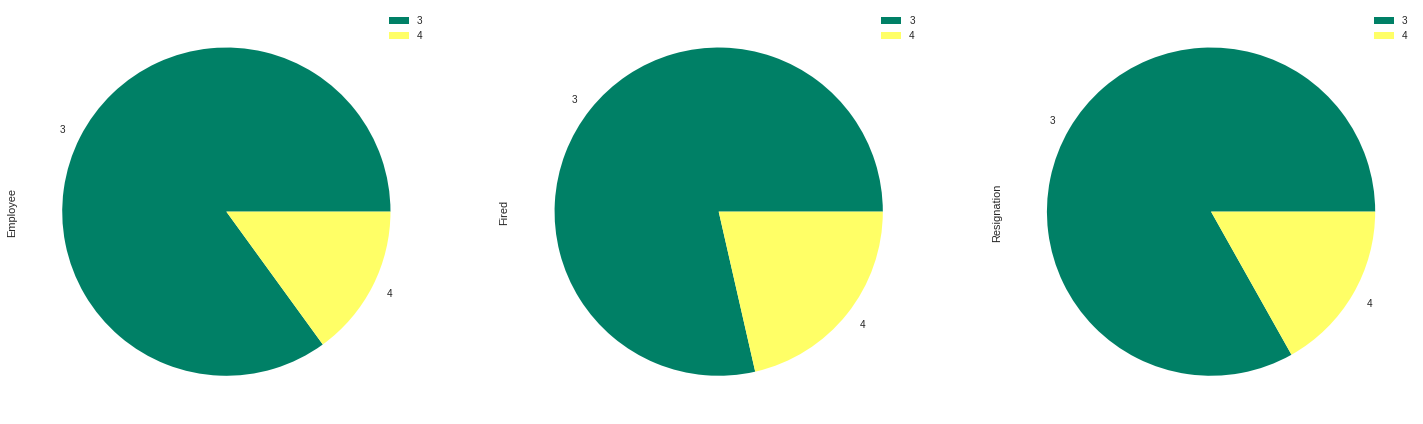

In [1245]:
#Satisfacción del manager con los empleados y retirados
pd.crosstab(index=df_data['PerformanceRating'],
            columns=df_data['retirementType']).plot(kind='pie', figsize=(25,10), colormap='summer', subplots='True') # Esta variable puede eliminarse pues el manager le da las mismas dos calificaciones a todos los empleados  

<AxesSubplot:xlabel='JobRole'>

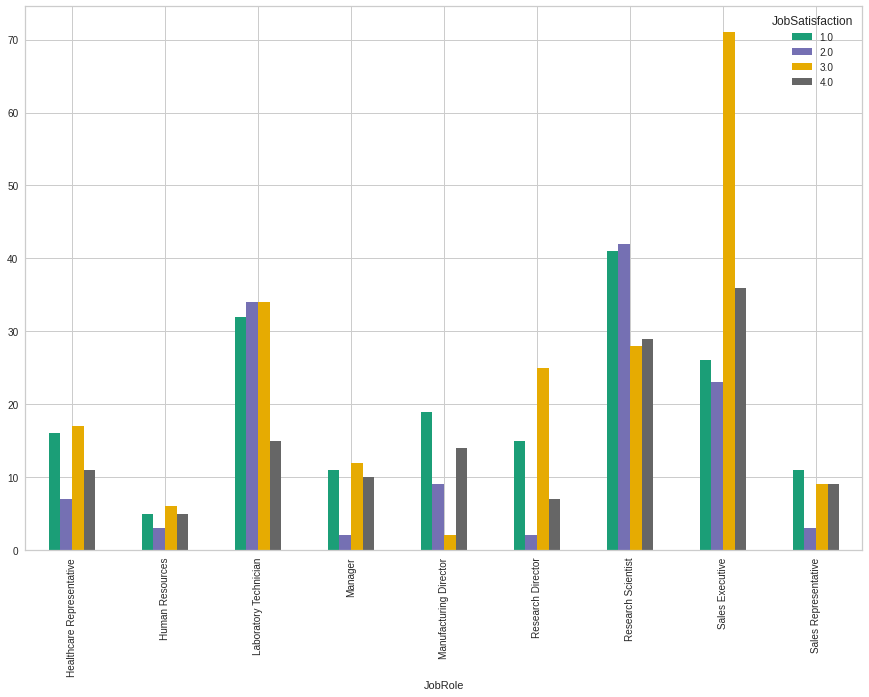

In [1246]:
#La satisfaccion  que tenian los retirados con cada rol de trabajo
base = df_data[df_data['retirementType'].isin(['Resignation'])]
pd.crosstab(index=base['JobRole'],
            columns=base['JobSatisfaction']).plot(kind='bar', figsize=(15,10),colormap='Dark2') 

In [1247]:
# ¿CÓMO ESTÁN DISTRUIBUIDOS LAS PERSONAS QUE HAN SALIDO DE LA EMPRESA?

base = df_data[df_data['retirementType'].isin(['Fired','Resignation'])] # creando un dataframe unicamente con los fired y resignation

# crear dataset
base= base.groupby(['retirementType'])[['EmployeeID']].count().sort_values('EmployeeID', ascending = False).reset_index()

# crear gráfica:
fig = px.pie(base, values = 'EmployeeID', names ='retirementType',
             title= '<b>Retiro de empleados año 2015-2016<b> Total de empleados retirados 710',
             color_discrete_sequence=px.colors.sequential.Blugrn)

# agregar detalles a la gráfica:
fig.update_layout(
    xaxis_title = 'Nivel Satisfacion',
    yaxis_title = 'Total empleados',
    template = 'simple_white',
    title_x = 0.5)
fig.show()

In [1248]:
#EDAD DE LOS RETIRADOS

# crear dataset
base = df_data[df_data['retirementType'].isin(['Fired','Resignation'])] # creando un dataframe unicamente con los barrio NAmes y CollgCr
base = base.groupby(['Age', 'retirementType'])[['EmployeeID']].count().reset_index()

# crear gráfica
fig = px.bar(base, x = 'Age', y='EmployeeID', color = 'retirementType', barmode = 'group', 
             title= '<b>Retiros por Edad',
             color_discrete_sequence=px.colors.sequential.Blugrn)

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Edad',
    yaxis_title = 'Total retiros',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [1249]:
#RETIROS POR AUMENTO SALARIAL

base = df_data[df_data['retirementType'].isin(['Fired','Resignation'])] # creando un dataframe unicamente con los fired y resignation
base = base.groupby(['PercentSalaryHike', 'retirementType'])[['EmployeeID']].count().sort_values('EmployeeID', ascending = False).reset_index()

# crear gráfica
fig = px.bar(base, x = 'PercentSalaryHike', y='EmployeeID', color = 'retirementType', barmode = 'group', 
             title= '<b>Retiros por Aumento Salarial',
             color_discrete_sequence=px.colors.sequential.Blugrn)

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Aumento Salarial',
    yaxis_title = 'Total retiros',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [1250]:
#RETIRO DE EMPLEADOS X NIVEL DE SATISFACION EN EL TRABAJO
base = df_data[df_data['retirementType'].isin(['Fired','Resignation'])] # creando un dataframe unicamente con los fired y resignation

dic = {1:'Low',
       2:'Medium',
       3:'High',
       4:'Very High'}
# crear dataset
base= base.groupby(['JobSatisfaction'])[['retirementType']].count().sort_values('retirementType', ascending = False).reset_index()
base['JobSatisfaction'] = base['JobSatisfaction'].replace(dic)


# crear gráfica:
fig = px.pie(base, values = 'retirementType', names ='JobSatisfaction',
             title= '<b>Retiro de empleados por nivel de satisfaccion en el trabajo<b>',
             color_discrete_sequence=px.colors.sequential.Blugrn)

# agregar detalles a la gráfica:
fig.update_layout(
    xaxis_title = 'Nivel Satisfacion',
    yaxis_title = 'Total empleados',
    template = 'simple_white',
    title_x = 0.5)
fig.show()

In [1251]:
#RETIROS POR AÑOS EN LA EMPRESA
base = df_data[df_data['retirementType'].isin(['Fired','Resignation'])] # creando un dataframe unicamente con los fired y resignation
base = base.groupby(['YearsAtCompany', 'retirementType'])[['EmployeeID']].count().sort_values('EmployeeID', ascending = False).reset_index()

# crear gráfica
fig = px.bar(base, x = 'YearsAtCompany', y='EmployeeID', color = 'retirementType', barmode = 'group', 
             title= '<b>Retiros por Años en la empresa',
             color_discrete_sequence=px.colors.sequential.Blugrn)

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Años en la Empresa',
    yaxis_title = 'Total retiros',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [1252]:
#RAZON DE RETIRO
base = df_data[df_data['retirementType'].isin(['Fired','Resignation'])] # creando un dataframe unicamente con los fired y resignation
base = base.groupby(['resignationReason', 'retirementType'])[['EmployeeID']].count().sort_values('EmployeeID', ascending = False).reset_index()

# crear gráfica
fig = px.bar(base, x = 'resignationReason', y='EmployeeID', color = 'retirementType', barmode = 'group', 
             title= '<b>Razon de retiro',
             color_discrete_sequence=px.colors.sequential.Blugrn)

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Razones de retiro',
    yaxis_title = 'Total retiros',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [1253]:
#Participación de los retirados 
base = df_data[df_data['retirementType'].isin(['Fired','Resignation'])] # creando un dataframe unicamente con los fired y resignation

dic = {1:'Low',
       2:'Medium',
       3:'High',
       4:'Very High'}
# crear dataset
base= base.groupby(['JobInvolvement'])[['EmployeeID']].count().sort_values('EmployeeID', ascending = False).reset_index()
base['JobInvolvement'] = base['JobInvolvement'].replace(dic)
# ExterQual: calidad del material del exterior del edificio

# crear gráfica:
fig = px.pie(base, values = 'EmployeeID', names ='JobInvolvement',
             title= '<b>Participación de trabajo de los empleados retirados<b>',
             color_discrete_sequence=px.colors.sequential.Blugrn)

# agregar detalles a la gráfica:
fig.update_layout(
    template = 'simple_white',
    title_x = 0.5)
fig.show()

array([<AxesSubplot:ylabel='Employee'>, <AxesSubplot:ylabel='Fired'>,
       <AxesSubplot:ylabel='Resignation'>], dtype=object)

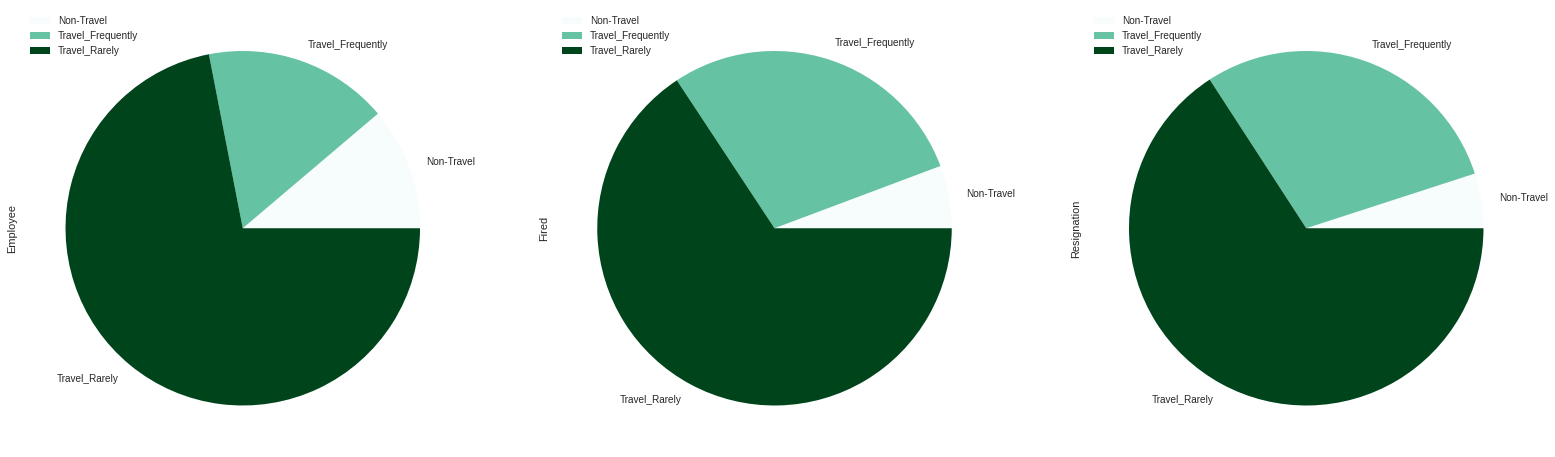

In [1254]:
#Los empleados y retirados y sus viajes por negocios 
pd.crosstab(index=df_data['BusinessTravel'],
            columns=df_data['retirementType']).plot(kind='pie', figsize=(27,10), colormap='BuGn', subplots='True') #Esta variable puede eliminarse por que tanto los empleados como los retirados tienen proporciones muy parecidad y la mayoria viaja en raras ocasiones 

<AxesSubplot:xlabel='YearsSinceLastPromotion'>

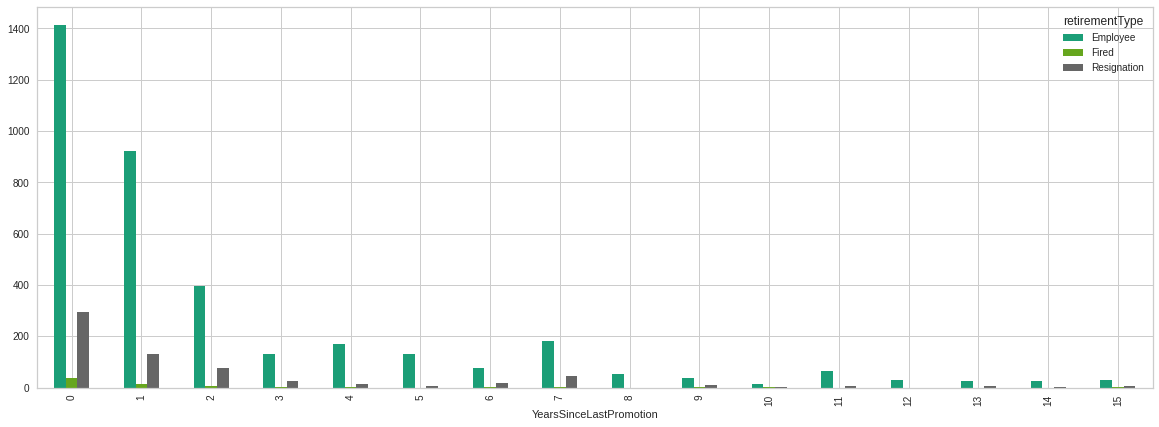

In [1255]:
# Años que han pasado desde la ultima promoción en general
pd.crosstab(index=df_data['YearsSinceLastPromotion'],
            columns=df_data['retirementType']).plot(kind='bar', figsize=(20,7), colormap='Dark2') #Los que mas retiran son en los que nuncca han tenido una promocion seguido de los que promovieron hace un año.

<AxesSubplot:xlabel='YearsWithCurrManager'>

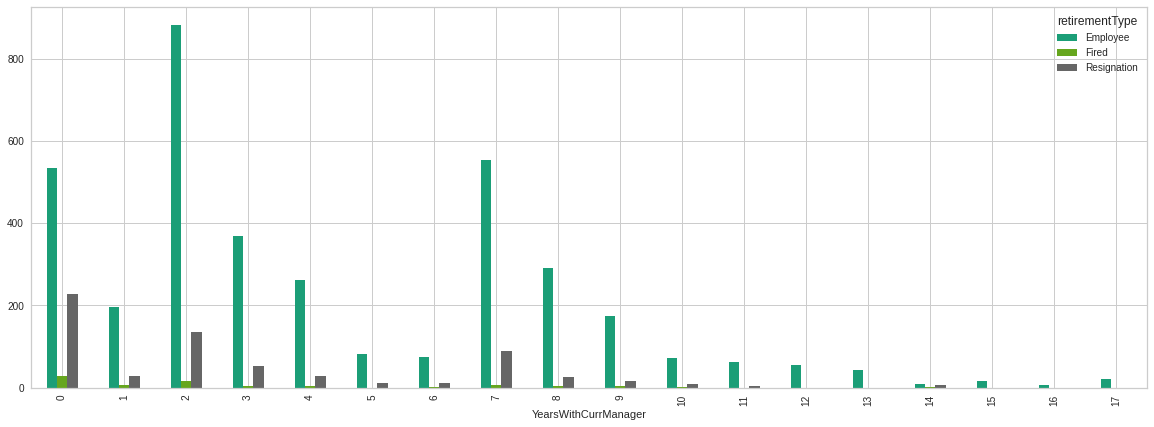

In [1256]:
# Años bajo el mando del gerente actual en general
pd.crosstab(index=df_data['YearsWithCurrManager'],
            columns=df_data['retirementType']).plot(kind='bar', figsize=(20,7), colormap='Dark2') # La mayoria de los que se retiran no han pasado ni un año con el gerente actual, seguido de los que llevanban 2 años bajo su mando y luego los que llevaban 7 años bajo su mando. 

In [1257]:
#Participación de los retirados 
base = df_data[df_data['retirementType'].isin(['Resignation'])] # creando un dataframe unicamente con los fired y resignation

dic = {1:'1',
       2:'2',
       3:'3',
       4:'4',
       5:'5'}
# crear dataset
base= base.groupby(['JobLevel'])[['EmployeeID']].count().sort_values('EmployeeID', ascending = False).reset_index()
base['JobLevel'] = base['JobLevel'].replace(dic)
# ExterQual: calidad del material del exterior del edificio

# crear gráfica:
fig = px.pie(base, values = 'EmployeeID', names ='JobLevel',
             title= '<b>Nivel de los retirados en el trabajo de 1 a 5<b>',
             color_discrete_sequence=px.colors.sequential.Blugrn)

# agregar detalles a la gráfica:
fig.update_layout(
    template = 'simple_white',
    title_x = 0.5)
fig.show() #La mayoria de los retirados es 2 seguido de 1 y 3 los que se puede inferir que la mayoria de los que se retiran son novatos en el trabajo que desempeñan

In [1258]:
#Educación de los retirados 
base = df_data[df_data['retirementType'].isin(['Resignation'])] # creando un dataframe unicamente con los fired y resignation

dic = {1:'Below College',
       2:'College',
       3:'Bachelor',
       4:'Master',
       5:'Doctor'}
# crear dataset
base= base.groupby(['Education'])[['EmployeeID']].count().sort_values('EmployeeID', ascending = False).reset_index()
base['Education'] = base['Education'].replace(dic)
# ExterQual: calidad del material del exterior del edificio

# crear gráfica:
fig = px.bar(base, x = 'Education', y='EmployeeID', color = 'Education', barmode = 'group', 
             title= '<b>Nivel de educación de los retirados<b>',
             color_discrete_sequence=px.colors.sequential.Blugrn)

# agregar detalles a la gráfica:
fig.update_layout(
    template = 'simple_white',
    title_x = 0.5)
fig.show() #La mayoria d elos retirados son bachilleres, seguido de los que tienen una maestria y los que solo tienen una formación universitaria sencilla

In [1259]:
#Años que llevaban los retirados en la empresa

base = df_data[df_data['retirementType'].isin(['Fired','Resignation'])] # creando un dataframe unicamente con los fired y resignation
base = base.groupby(['YearsAtCompany', 'retirementType'])[['EmployeeID']].count().sort_values('EmployeeID', ascending = False).reset_index()

# crear gráfica
fig = px.bar(base, x = 'YearsAtCompany', y='EmployeeID', color = 'retirementType', barmode = 'group', 
             title= '<b>Años que llevaba un retirado trabajando en la empresa<b>',
             color_discrete_sequence=px.colors.sequential.Blugrn)

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Años en la',
    yaxis_title = 'Total retiros',
    template = 'simple_white',
    title_x = 0.5)

fig.show() # La mayoria de los retirados se fueron en el primer año

In [1260]:
#Estado civil de los retirados

base = df_data[df_data['retirementType'].isin(['Fired','Resignation'])] # creando un dataframe unicamente con los fired y resignation
base = base.groupby(['MaritalStatus', 'retirementType'])[['EmployeeID']].count().sort_values('EmployeeID', ascending = False).reset_index()

# crear gráfica
fig = px.bar(base, x = 'MaritalStatus', y='EmployeeID', color = 'retirementType', barmode = 'group', 
             title= '<b>Estado civil de los retirados<b>',
             color_discrete_sequence=px.colors.sequential.Blugrn)

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Estado marital',
    yaxis_title = 'Total retiros',
    template = 'simple_white',
    title_x = 0.5)

fig.show()


# **Modelos**

### **Variables escogidas y conversión de categoricas a dummies**

In [1261]:
#from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors, datasets, preprocessing, tree
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, cross_val_score, KFold, train_test_split, GridSearchCV, cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, f1_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve, auc,roc_auc_score
from sklearn import metrics
from yellowbrick.classifier import ROCAUC


In [1262]:
df_data

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,retirementType,resignationReason
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,...,1,0,0,3.0,4.0,2.0,3,3,Employee,Active
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,Research Scientist,...,5,1,4,3.0,2.0,4.0,2,4,Resignation,Others
2,32,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,Sales Executive,...,5,0,3,2.0,2.0,1.0,3,3,Employee,Active
3,38,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,Human Resources,...,8,7,5,4.0,4.0,3.0,2,3,Employee,Active
4,32,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,Sales Executive,...,6,0,4,4.0,1.0,3.0,3,3,Employee,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,Travel_Rarely,Research & Development,5,4,Medical,4406,Female,1,Research Scientist,...,3,0,2,4.0,1.0,3.0,3,3,Employee,Active
4406,29,Travel_Rarely,Research & Development,2,4,Medical,4407,Male,1,Laboratory Technician,...,3,0,2,4.0,4.0,3.0,2,3,Employee,Active
4407,25,Travel_Rarely,Research & Development,25,2,Life Sciences,4408,Male,2,Sales Executive,...,4,1,2,1.0,3.0,3.0,3,4,Employee,Active
4408,42,Travel_Rarely,Sales,18,2,Medical,4409,Male,1,Laboratory Technician,...,9,7,8,4.0,1.0,3.0,2,3,Employee,Active


In [1263]:
# Se aplican los cambios y se elimina variables que se analizaron en el analisis exploratorio no aportan o tienen los mismos datos en su mayoria 
df_data=df_data.drop(['PerformanceRating'],axis=1) # se elimina ya que cuenta con na correlación muy alta y con las mismas calificaciones a todos los empleados y retirados de 3 y 4 
df_data=df_data.drop(['resignationReason'],axis=1) # se elimina esta variable ya que no nos interesa para la predicción de si se retira o no ademas de tener distinta temporalidad.

In [1264]:
df_data['retirementType'].value_counts() # Se volvera esta variable binaria juntando la categoria Fired con la de Resignation, osea volvemos parte de los activos a los que fueron despedidos ya que son muy pocos 70/710.

Employee       3699
Resignation     641
Fired            70
Name: retirementType, dtype: int64

In [1265]:
#Volvemos la variable de interes retirementType binaria siendo 1 retirado y 0 los demas, se agrega los echados a los demas pues nos interesan solo los retirados
df_data['retirementType']=df_data['retirementType'].replace(['Resignation'], 1)
df_data['retirementType']=df_data['retirementType'].replace(['Employee','Fired'], 0)

In [1266]:
#Variables escogidas en total
df_data.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeID', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'retirementType'],
      dtype='object')

In [1267]:
#Variables categoricas
df_data.describe(include='object')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
count,4410,4410,4410,4410,4410,4410
unique,3,3,6,2,9,3
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married
freq,3129,2883,1818,2646,978,2019


In [1268]:
#Variables cuantitativas
df_data.describe()

,Age,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,retirementType
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,2205.500000,2.063946,65029.312925,2.691837,15.209524,0.793878,11.269161,2.799320,7.008163,2.187755,4.123129,2.725170,2.729478,2.763492,2.729932,0.145351
std,9.133301,8.105026,1.023933,1273.201673,1.106689,47068.888559,2.493912,3.659108,0.851883,7.777927,1.288978,6.125135,3.221699,3.567327,1.089852,1.098904,0.703541,0.711400,0.352495
min,18.000000,1.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,1103.250000,1.000000,29110.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,36.000000,7.000000,3.000000,2205.500000,2.000000,49190.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000
75%,43.000000,14.000000,4.000000,3307.750000,3.000000,83800.000000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,0.000000
max,60.000000,29.000000,5.000000,4410.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [1269]:
#Volver las variables categoricas mostradas anteriormente a dummies creando un dataframe a parte con ellas
df1=df_data[['BusinessTravel','Department','EducationField', 'Gender','JobRole', 'MaritalStatus']]
df_dummys=pd.get_dummies(df1)

In [1270]:
df_dummys.info() #Descripción de las variables dummies

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   BusinessTravel_Non-Travel          4410 non-null   uint8
 1   BusinessTravel_Travel_Frequently   4410 non-null   uint8
 2   BusinessTravel_Travel_Rarely       4410 non-null   uint8
 3   Department_Human Resources         4410 non-null   uint8
 4   Department_Research & Development  4410 non-null   uint8
 5   Department_Sales                   4410 non-null   uint8
 6   EducationField_Human Resources     4410 non-null   uint8
 7   EducationField_Life Sciences       4410 non-null   uint8
 8   EducationField_Marketing           4410 non-null   uint8
 9   EducationField_Medical             4410 non-null   uint8
 10  EducationField_Other               4410 non-null   uint8
 11  EducationField_Technical Degree    4410 non-null   uint8
 12  Gender_Female       

In [1271]:
df_dummys.describe() #Todas se volvieron binarias

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,0.102041,0.188435,0.709524,0.042857,0.653741,0.303401,0.018367,0.412245,0.108163,0.315646,...,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463,0.222449,0.457823,0.319728
std,0.302736,0.391104,0.454034,0.202558,0.475831,0.459779,0.134291,0.492295,0.310622,0.464825,...,0.381025,0.254141,0.298211,0.226874,0.399021,0.415483,0.230839,0.415938,0.498274,0.466424
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1272]:
#Dataframe con variables cuantitativas
df2=df_data[['Age','DistanceFromHome', 'Education', 'EmployeeID','JobLevel','MonthlyIncome', 
             'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel','TotalWorkingYears', 
              'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 
              'EnvironmentSatisfaction', 'JobSatisfaction','WorkLifeBalance','JobInvolvement','retirementType']]

In [1273]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   DistanceFromHome         4410 non-null   int64  
 2   Education                4410 non-null   int64  
 3   EmployeeID               4410 non-null   int64  
 4   JobLevel                 4410 non-null   int64  
 5   MonthlyIncome            4410 non-null   int64  
 6   NumCompaniesWorked       4410 non-null   float64
 7   PercentSalaryHike        4410 non-null   int64  
 8   StockOptionLevel         4410 non-null   int64  
 9   TotalWorkingYears        4410 non-null   float64
 10  TrainingTimesLastYear    4410 non-null   int64  
 11  YearsAtCompany           4410 non-null   int64  
 12  YearsSinceLastPromotion  4410 non-null   int64  
 13  YearsWithCurrManager     4410 non-null   int64  
 14  EnvironmentSatisfaction 

In [1274]:
#df2=df2.drop(['EmployeeID'],axis=1) #Eliminamos la columna de EmployeeID de las variables cuantitativas pues solo es el identificador del empleado lo que nos puede afectar la predicción

In [1275]:
#Creamos un dataframe final que contenga las dummies y las cuantitativas para proceder con la clasificación de conjunto X y Y para los modelos
df_final=pd.concat([pd.DataFrame(df2), pd.DataFrame(df_dummys)], axis = 1)
df_final.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4410 non-null   int64  
 1   DistanceFromHome                   4410 non-null   int64  
 2   Education                          4410 non-null   int64  
 3   EmployeeID                         4410 non-null   int64  
 4   JobLevel                           4410 non-null   int64  
 5   MonthlyIncome                      4410 non-null   int64  
 6   NumCompaniesWorked                 4410 non-null   float64
 7   PercentSalaryHike                  4410 non-null   int64  
 8   StockOptionLevel                   4410 non-null   int64  
 9   TotalWorkingYears                  4410 non-null   float64
 10  TrainingTimesLastYear              4410 non-null   int64  
 11  YearsAtCompany                     4410 non-null   int64

In [1276]:
df_final.columns

Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeID', 'JobLevel',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'retirementType', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing

In [1277]:
# Clasificación de variable objetivo Y y variables predictoras X
y= df_final['retirementType']
X=df_final.loc[:,~df_final.columns.isin(['retirementType'])]


In [1278]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4410 non-null   int64  
 1   DistanceFromHome                   4410 non-null   int64  
 2   Education                          4410 non-null   int64  
 3   EmployeeID                         4410 non-null   int64  
 4   JobLevel                           4410 non-null   int64  
 5   MonthlyIncome                      4410 non-null   int64  
 6   NumCompaniesWorked                 4410 non-null   float64
 7   PercentSalaryHike                  4410 non-null   int64  
 8   StockOptionLevel                   4410 non-null   int64  
 9   TotalWorkingYears                  4410 non-null   float64
 10  TrainingTimesLastYear              4410 non-null   int64  
 11  YearsAtCompany                     4410 non-null   int64

In [1279]:
y

0       0
1       1
2       0
3       0
4       0
       ..
4405    0
4406    0
4407    0
4408    0
4409    0
Name: retirementType, Length: 4410, dtype: int64

In [1280]:
# Se hace Cross-validation para dividir los datos en 10 pliegues y poder probar los modelos
kfold = KFold(n_splits=10, random_state=0, shuffle=True)

In [1281]:
# Se separa los datos de entrenamiento y los de testeo, se decide escoger el 80% para entrenamiento y el 20% para el testeo por la poca cantidad de datos de retirados que hay 641/4410
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

### **Modelos probados en las variables originales**

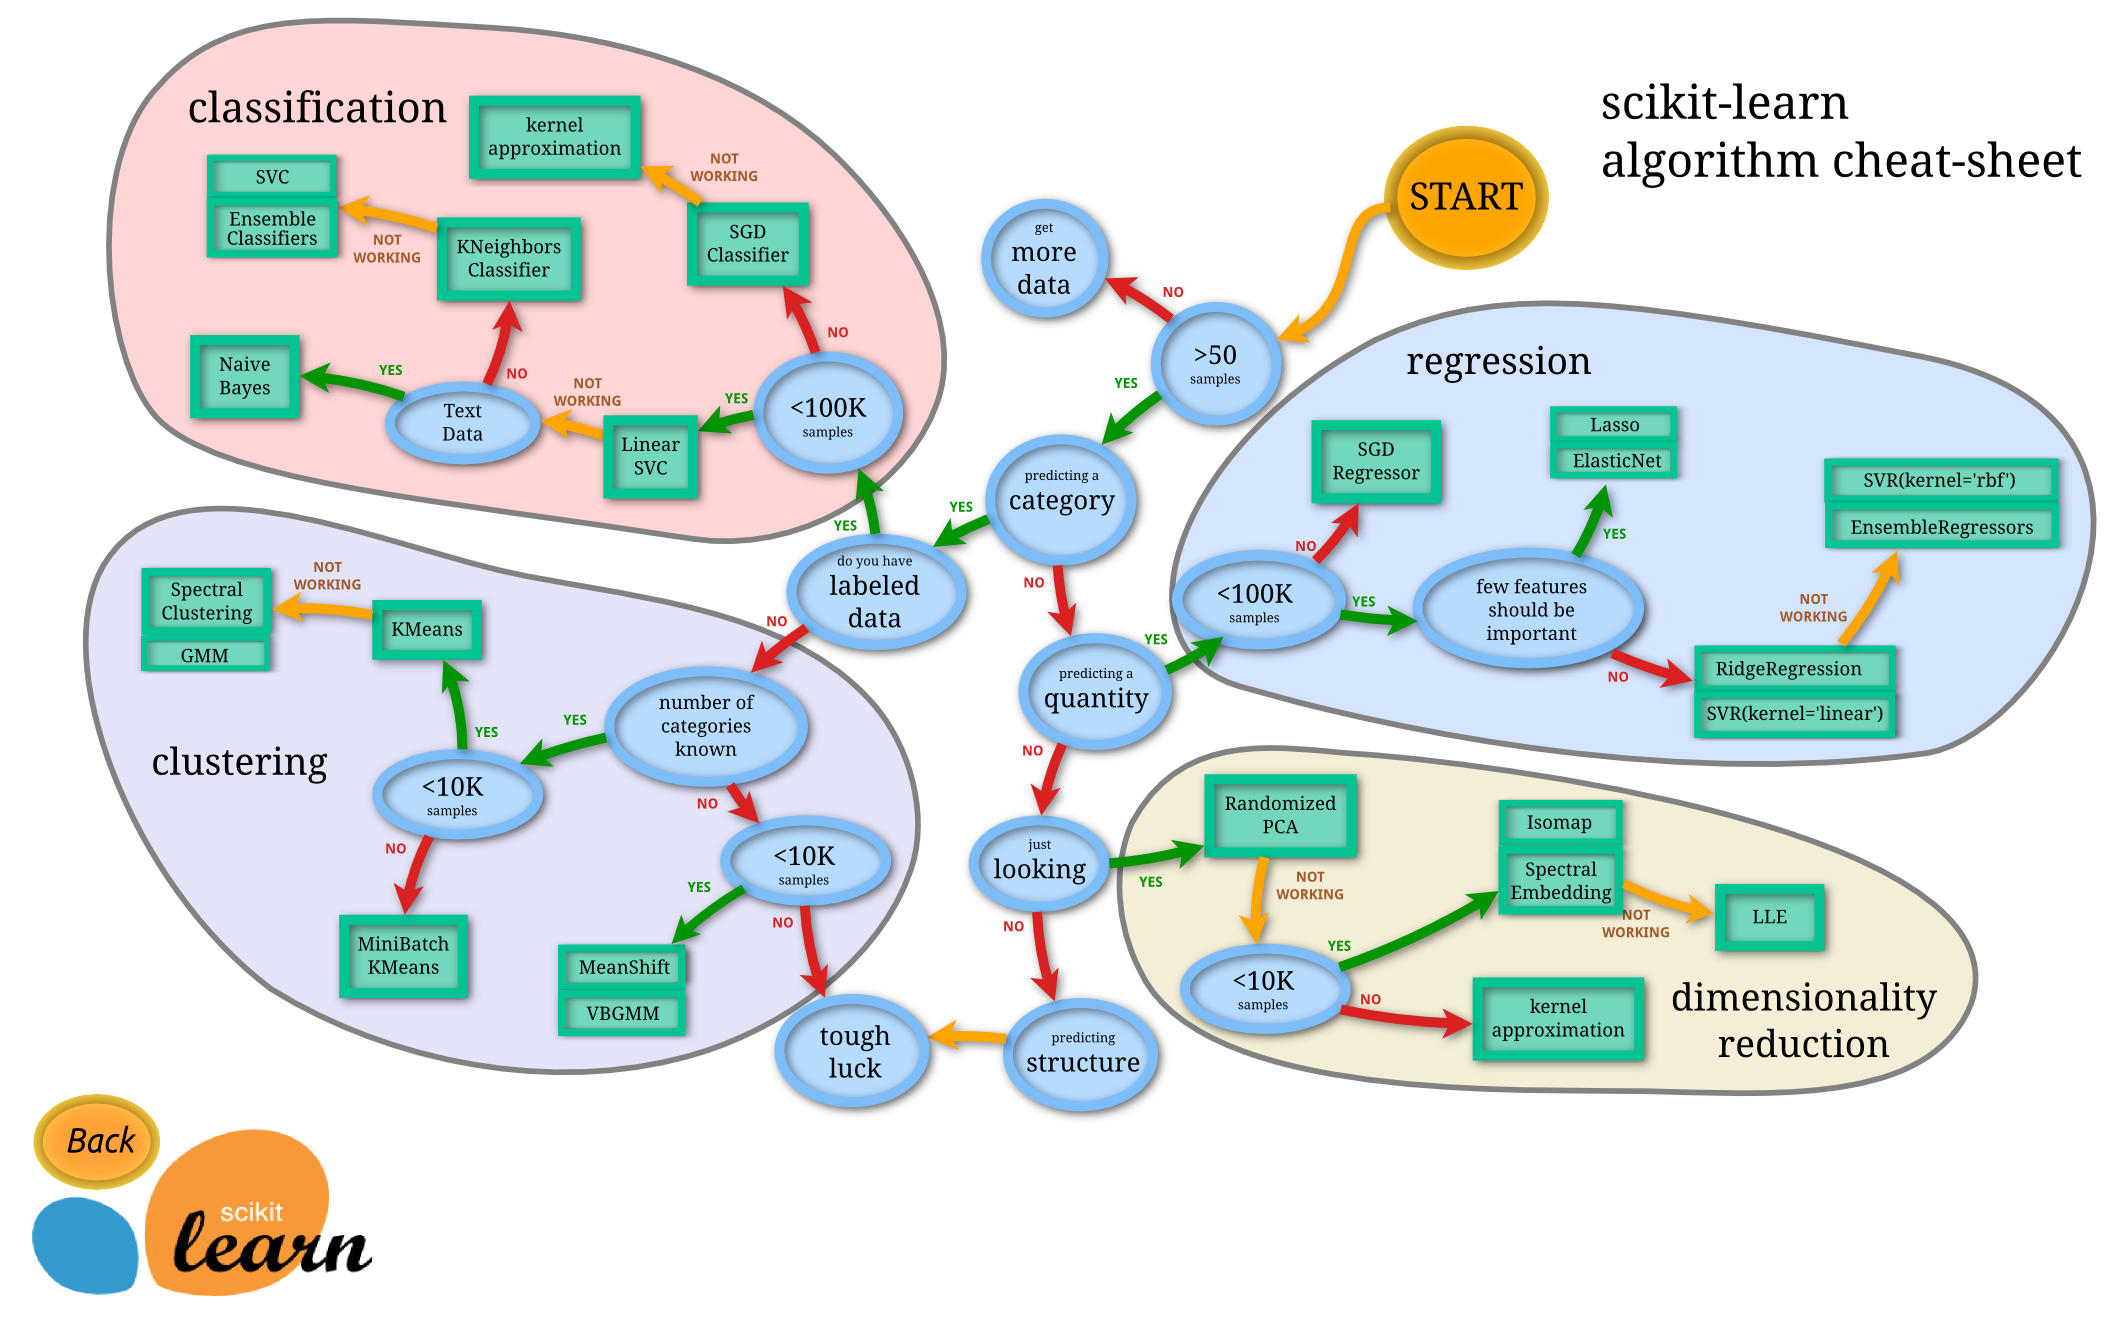


#### **Decision tree**

In [1282]:
# Modelo Decission Tree
DT = DecisionTreeClassifier()
DTR = DT.fit(X_train.drop('EmployeeID',axis=1),y_train)
y_pred = DTR.predict(X_test.drop('EmployeeID',axis=1))
scoring=metrics.accuracy_score(y_test, y_pred)
scoring

0.9603174603174603

In [1283]:
recal=metrics.recall_score(y_test, y_pred)
recal

0.849624060150376

In [1284]:
confusion_matrix(y_test, y_pred)  

array([[734,  15],
       [ 20, 113]])

In [1285]:
DTcla=print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.98      0.98       749
           1       0.88      0.85      0.87       133

    accuracy                           0.96       882
   macro avg       0.93      0.91      0.92       882
weighted avg       0.96      0.96      0.96       882



#### **Logistic Regression**

In [1286]:
LoReg = LogisticRegression()
logReg=LoReg.fit(X_train.drop('EmployeeID',axis=1),y_train)
ypred2=logReg.predict(X_test.drop('EmployeeID',axis=1))
scoring=metrics.accuracy_score(y_test, ypred2)
scoring

0.8492063492063492

In [1287]:
recal=metrics.recall_score(y_test, ypred2)
recal

0.0

In [1288]:
confusion_matrix(y_test, ypred2)

array([[749,   0],
       [133,   0]])

In [1289]:
LRcla=print(classification_report(y_test, ypred2))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       749
           1       0.00      0.00      0.00       133

    accuracy                           0.85       882
   macro avg       0.42      0.50      0.46       882
weighted avg       0.72      0.85      0.78       882



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#### **Random Forest**

In [1290]:
RandomForest = RandomForestClassifier()
randomf= RandomForest.fit(X_train.drop('EmployeeID',axis=1),y_train)
y_pred3=randomf.predict(X_test.drop('EmployeeID',axis=1))
scoring=metrics.accuracy_score(y_test, y_pred3)
scoring

0.963718820861678

In [1291]:
recal=metrics.recall_score(y_test, y_pred3)
recal

0.8421052631578947

In [1292]:
confusion_matrix(y_test, y_pred3)

array([[738,  11],
       [ 21, 112]])

In [1293]:
RFcla=print(classification_report(y_test, y_pred3))
RFcla

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       749
           1       0.91      0.84      0.87       133

    accuracy                           0.96       882
   macro avg       0.94      0.91      0.93       882
weighted avg       0.96      0.96      0.96       882



### **Selección de features con metodo**

##### **KBest**

In [1294]:
KBest = SelectKBest(score_func=f_classif, k=10)
fit = KBest.fit(X.drop('EmployeeID',axis=1),y)
var_n = fit.get_feature_names_out().tolist()

In [1295]:
var_n # Nos retorna las variables que son mas significativas para el metodo Kbest 

['Age',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsWithCurrManager',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'BusinessTravel_Travel_Frequently',
 'EducationField_Human Resources',
 'MaritalStatus_Married',
 'MaritalStatus_Single']

In [1296]:
var_n.append('EmployeeID')

In [1297]:
#Creamos un nuevo conjunto con estas variables
X2_train=X_train[var_n]
X2_test=X_test[var_n]


### **Modelos Probados con los features generados**

#### **Decision tree**

In [1298]:
# Modelo Decission Tree
DT = DecisionTreeClassifier()
DTR = DT.fit(X2_train.drop('EmployeeID',axis=1),y_train)
y2_pred = DTR.predict(X2_test.drop('EmployeeID',axis=1))
scoring=metrics.accuracy_score(y_test, y2_pred)
scoring

0.9501133786848073

In [1299]:
recal=metrics.recall_score(y_test, y2_pred)
recal

0.8571428571428571

In [1300]:
confusion_matrix(y_test, y2_pred)

array([[724,  25],
       [ 19, 114]])

In [1301]:
DTcla=print(classification_report(y_test, y2_pred))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       749
           1       0.82      0.86      0.84       133

    accuracy                           0.95       882
   macro avg       0.90      0.91      0.90       882
weighted avg       0.95      0.95      0.95       882



#### **Logistic Regression**

In [1302]:
LoReg = LogisticRegression()
logReg=LoReg.fit(X2_train.drop('EmployeeID',axis=1),y_train)
y2pred=logReg.predict(X2_test.drop('EmployeeID',axis=1))
scoring=metrics.accuracy_score(y_test, y2pred)
scoring

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.86281179138322

In [1303]:
recal=metrics.recall_score(y_test, y2pred)
recal

0.09022556390977443

In [1304]:
confusion_matrix(y_test, y2pred)

array([[749,   0],
       [121,  12]])

In [1305]:
LRcla=print(classification_report(y_test, y2pred))


              precision    recall  f1-score   support

           0       0.86      1.00      0.93       749
           1       1.00      0.09      0.17       133

    accuracy                           0.86       882
   macro avg       0.93      0.55      0.55       882
weighted avg       0.88      0.86      0.81       882



#### **Random Forest**

In [1306]:
RandomForest = RandomForestClassifier()
randomf= RandomForest.fit(X2_train.drop('EmployeeID',axis=1),y_train)
y_pred2=randomf.predict(X2_test.drop('EmployeeID',axis=1))
scoring=metrics.accuracy_score(y_test, y_pred2)
scoring

0.9648526077097506

In [1307]:
recal=metrics.recall_score(y_test, y_pred2)
recal

0.8646616541353384

In [1308]:
confusion_matrix(y_test, y_pred2)

array([[736,  13],
       [ 18, 115]])

In [1309]:
RFcla=print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       749
           1       0.90      0.86      0.88       133

    accuracy                           0.96       882
   macro avg       0.94      0.92      0.93       882
weighted avg       0.96      0.96      0.96       882



### **Escogencia de Modelo**

In [1310]:
# Que modelo se comporta mejor
def comparar_modelos(modelos, X, y, scoring, cv, cross_val_score, pd,Features):

    metric_modelos = pd.DataFrame()
    for modelo in modelos:
        scores = cross_val_score(modelo, X, y, cv=cv, scoring=scoring)
        pdscores = pd.DataFrame(scores)
        metric_modelos = pd.concat([metric_modelos, pdscores], axis=1)

    metric_modelos.columns = ['DecisionTree','LogisticRegression', 'RandomForest']
    metric_modelos['Features']=Features
    return metric_modelos

In [1311]:
# K fold cross validation
score_X = comparar_modelos([DecisionTreeClassifier(),LogisticRegression(), RandomForestClassifier()], X_train.drop('EmployeeID',axis=1), y_train, 'recall', kfold, cross_val_score, pd, 'All')
score_X2 = comparar_modelos([DecisionTreeClassifier(),LogisticRegression(), RandomForestClassifier()], X2_train.drop('EmployeeID',axis=1), y_train, 'recall', kfold, cross_val_score, pd,'Kbest')

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/lin

In [1312]:
cross_val=pd.concat([score_X, score_X2], axis=0) # DataFrame con ambas mediciones y features

In [1313]:
cross_val

,DecisionTree,LogisticRegression,RandomForest,Features
0,0.708333,0.000000,0.750000,All
1,0.702128,0.000000,0.723404,All
2,0.865385,0.000000,0.884615,All
3,0.666667,0.000000,0.708333,All
4,0.772727,0.000000,0.840909,All
5,0.875000,0.000000,0.875000,All
6,0.730159,0.000000,0.682540,All
7,0.810345,0.000000,0.810345,All
8,0.833333,0.000000,0.785714,All
9,0.660000,0.000000,0.680000,All


In [1314]:
fig = go.Figure()
for column in cross_val.columns[:-1]:
  fig.add_trace(go.Box(
      y=cross_val[column],
      x=cross_val.iloc[:,-1],
      name = column
  ))
fig.update_layout(
    yaxis_title='score',
    boxmode='group',
    colorway=px.colors.sequential.Aggrnyl
)

fig.show()

##### **Con base en lo anterior, de los 3 modelos comparados solo 2 tuvieron un rendimiento del mas del 93% que fueron el modelo Decission Tree y Random Forest, ambos modelos tienen matrices de confuncion muy parecidas, con numero de FN y FP muy cercanos y con valores de TP y TN tambien muy parecidos, esto se amplia en el informe correspondiente, por lo tanto se decide implementar el modelo con mas facilidad de interpretación el cual es el modelo de Decission Tree con los features esocgidos con el metodo KBest ya que hace mucho mas facil la interpretación del modelo, ya que se tiene rendimientos muy cercanos sea con los features iniciales o con los elegidos con KBest.**

In [1315]:
# Dicho lo anterior hacemos de nuevo el modelo con las condiciones selecionadas con todas las variables y haciendo el Decission Tree
# Modelo Decission Tree
DT = DecisionTreeClassifier()
DTR = DT.fit(X2_train.drop('EmployeeID',axis=1),y_train)
y_pred = DTR.predict(X2_test.drop('EmployeeID',axis=1))
scoring=metrics.accuracy_score(y_test, y_pred)
scoring
DTcla=print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       749
           1       0.86      0.81      0.84       133

    accuracy                           0.95       882
   macro avg       0.92      0.89      0.90       882
weighted avg       0.95      0.95      0.95       882



In [1316]:
DTvar=pd.DataFrame(DTR.feature_importances_, index=X2_train.drop('EmployeeID',axis=1).columns)[:47]
DTvar.sort_values(0,ascending=False)

,0
Age,0.260352
TotalWorkingYears,0.164200
YearsAtCompany,0.129033
JobSatisfaction,0.114774
EnvironmentSatisfaction,0.098978
YearsWithCurrManager,0.095489
BusinessTravel_Travel_Frequently,0.056767
MaritalStatus_Married,0.039384
EducationField_Human Resources,0.021049
MaritalStatus_Single,0.019975


### **Hiperparametrización**

In [1317]:
#Parametros para el modelo de Decision Tree Classifier
modelo = DecisionTreeClassifier()
modelo.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [1318]:
# Se hace una busqueda de rejilla con Grid Search CV con los siguientes parametros 
param_grid = [
              {'class_weight': ['balanced'],
               'max_leaf_nodes':[200,350], # número máximo de nodos finales.
               'min_samples_split' :[3,4,5], #número mínimo de muestras que debe haber en un nodo final (hoja).
               'min_samples_leaf': [1,2,3]} # número mínimo de muestras necesarias antes de dividir un nodo.
              ]
grid_search = GridSearchCV(modelo, param_grid=param_grid, cv=kfold, scoring='accuracy')
grid_search.fit(X2_train.drop('EmployeeID',axis=1), y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid=[{'class_weight': ['balanced'],
                          'max_leaf_nodes': [200, 350],
                          'min_samples_leaf': [1, 2, 3],
                          'min_samples_split': [3, 4, 5]}],
             scoring='accuracy')

In [1319]:
pd.DataFrame(grid_search.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'class_weight': 'balanced', 'max_leaf_nodes':...",0.865644,12
1,"{'class_weight': 'balanced', 'max_leaf_nodes':...",0.867062,11
2,"{'class_weight': 'balanced', 'max_leaf_nodes':...",0.868195,10
3,"{'class_weight': 'balanced', 'max_leaf_nodes':...",0.860541,15
4,"{'class_weight': 'balanced', 'max_leaf_nodes':...",0.861105,14
5,"{'class_weight': 'balanced', 'max_leaf_nodes':...",0.863089,13
6,"{'class_weight': 'balanced', 'max_leaf_nodes':...",0.848067,18
7,"{'class_weight': 'balanced', 'max_leaf_nodes':...",0.848636,17
8,"{'class_weight': 'balanced', 'max_leaf_nodes':...",0.850619,16
9,"{'class_weight': 'balanced', 'max_leaf_nodes':...",0.955500,1


In [1320]:
grid_search.best_params_

{'class_weight': 'balanced',
 'max_leaf_nodes': 350,
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [1321]:
grid_search.best_score_ 

0.9554999356167911

###### **Con los hiperparametros subimos el accuracy muy poco pero esta bien, tiene buen rendimiento.**

### **Evaluación del Modelo**

In [1322]:
#Realizamos el modelo con los hiperparametros aplicados
finalmodel= DecisionTreeClassifier(class_weight= 'balanced', max_leaf_nodes= 350, min_samples_split=3, min_samples_leaf=1)
finalmodel.fit(X2_train.drop('EmployeeID',axis=1),y_train)
predicted=finalmodel.predict(X2_test.drop('EmployeeID',axis=1))
report=classification_report(y_test, predicted)
print(report)
# recall -> predicciones correctas para una clase entre el total de registros reales de esa clase en el dataset
# precision -> predicciones correctas para una clase entre el total de predicciones realizadas por el modelo para esa clase

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       749
           1       0.85      0.96      0.90       133

    accuracy                           0.97       882
   macro avg       0.92      0.97      0.94       882
weighted avg       0.97      0.97      0.97       882



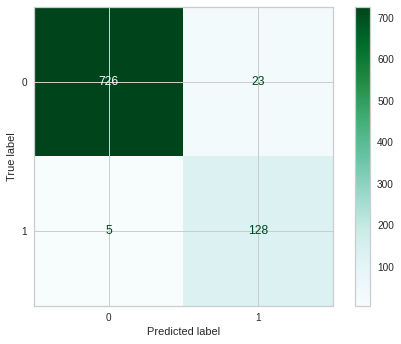

In [1323]:
#Se hace la confusion matrix
matrix = confusion_matrix(y_test, predicted)
display = ConfusionMatrixDisplay(confusion_matrix = matrix)
display.plot(cmap='BuGn')

plt.show()

In [1324]:
#Logistic Loss
score='neg_log_loss'
resultado = cross_val_score(finalmodel, X.drop('EmployeeID',axis=1), y, cv=kfold, scoring=score)
cl3= resultado.mean()*-100
cl3

75.65483666268509

In [1325]:
# Se analizan las variables y su correlación con la variable predicha
pd.merge(
    pd.DataFrame(finalmodel.feature_importances_, 
             index=finalmodel.feature_names_in_, 
             columns=['Value']
    ),
         
    pd.concat([X, pd.DataFrame(y, columns=['retirementType'])], 
              axis = 1).corr()[['retirementType']].rename(columns={'retirementType':'Correlations'}),

    left_index=True, right_index=True, how = 'left').sort_values(by='Value', ascending=False)

,Value,Correlations
Age,0.258933,-0.141897
YearsAtCompany,0.154794,-0.128184
TotalWorkingYears,0.150131,-0.158548
YearsWithCurrManager,0.118954,-0.144643
EnvironmentSatisfaction,0.103797,-0.087870
JobSatisfaction,0.103422,-0.098132
MaritalStatus_Married,0.038683,-0.085828
BusinessTravel_Travel_Frequently,0.033969,0.108933
MaritalStatus_Single,0.033355,0.162858
EducationField_Human Resources,0.003963,0.092122


In [1326]:
evaluation = pd.DataFrame(cross_validate(finalmodel, X.drop('EmployeeID',axis=1), y, cv=kfold, return_train_score=True, scoring='accuracy'))

In [1327]:
evaluation[['train_score', 'test_score']]

,train_score,test_score
0,0.985135,0.975057
1,0.985639,0.975057
2,0.984631,0.986395
3,0.985135,0.977324
4,0.984379,0.972789
5,0.985135,0.972789
6,0.984631,0.984127
7,0.985891,0.979592
8,0.985387,0.979592
9,0.984631,0.984127


In [1328]:
# Area bajo la curva
roc_auc_score(y_test, predicted)

0.9658492024453658

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



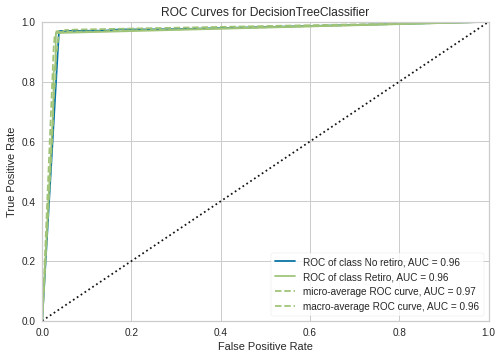

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [1329]:
visualizer = ROCAUC(finalmodel, classes=["No retiro", "Retiro"])

visualizer.fit(X2_train.drop('EmployeeID',axis=1), y_train)        # Fit the training data to the visualizer
visualizer.score(X2_test.drop('EmployeeID',axis=1), y_test)        # Evaluate the model on the test data
visualizer.show() 

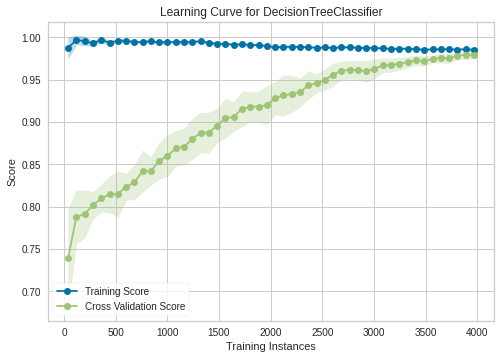

<AxesSubplot:title={'center':'Learning Curve for DecisionTreeClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [1330]:
#Curva de aprendizaje 
from yellowbrick.model_selection import LearningCurve
visualizer = LearningCurve(
    finalmodel, cv=kfold, scoring='f1_weighted', train_sizes=np.linspace(0.01, 1.0, 50), n_jobs=-1
)

visualizer.fit(X.drop('EmployeeID',axis=1), y)        
visualizer.show()   

### **Despliegue**

In [1331]:
import pickle
pickle.dump(finalmodel, open('/content/finalmodel_save','wb'))

In [1332]:
final_model=pickle.load(open('/content/finalmodel_save','rb'))

In [1333]:
X2_test['Prediction']=final_model.predict(X2_test.drop('EmployeeID',axis=1))

<ipython-input-1333-cf1a026950fa>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1334]:
predictions=X2_test[['EmployeeID', 'Prediction']]

In [1335]:
predictions

,EmployeeID,Prediction
3686,3687,0
1085,1086,0
2486,2487,0
1473,1474,0
2896,2897,1
...,...,...
3175,3176,0
2636,2637,0
3340,3341,0
1415,1416,0


In [1336]:
#Exportar para csv
predictions.to_csv('predictions_month.csv', index=False, sep=';')

In [1337]:
#Exportar para excel
predictions.to_excel('predictions_month.xlsx',index=False)